### STEPS
* Camera Calibration
* Distortion Correction
* Perspective Transform
* Color & Gradient Threshold
* Find the lines
    * Sliding window search
    * Measuring the curvature

In [4]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
%matplotlib inline

In [3]:
objp = np.zeros((6 * 9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images
objpoints = [] # 3d objects in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # find the chessboard color
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # Draw and display the corners
        # cv2.drawChessboardCorners(img, (9, 6), corners, ret)
        # cv2.imshow('img', img)
        # cv2.waitKey(500)

# cv2.destroyAllWindows()

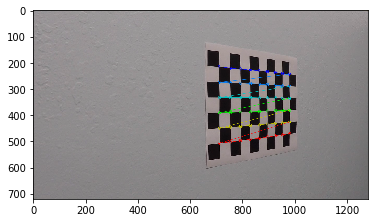

In [4]:
cv2.drawChessboardCorners(img, (9, 6), corners, ret)
plt.imshow(img)
plt.show()

Text(0.5,1,'Undistorted Image')

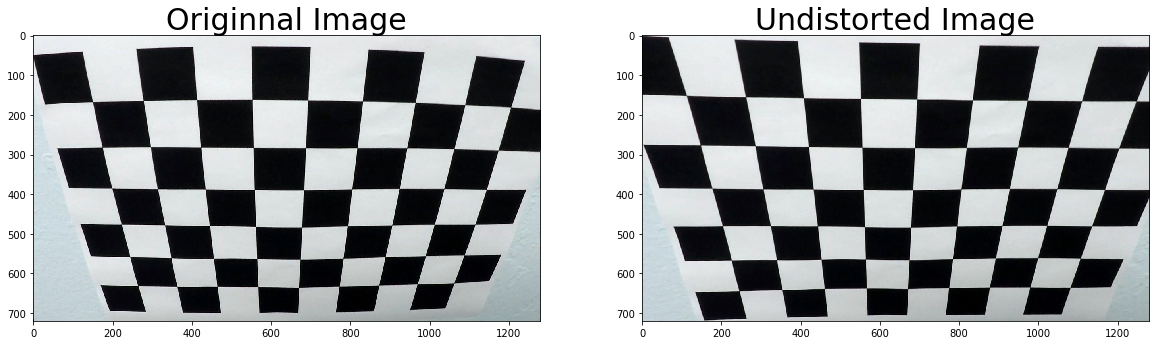

In [7]:
# calibration test
test_img = cv2.imread('camera_cal/calibration2.jpg')
img_size = (img.shape[1], img.shape[0])

# start calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
undst_img = cv2.undistort(test_img, mtx, dist, None, mtx)

# visualize the undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(test_img)
ax1.set_title('Originnal Image', fontsize=30)
ax2.imshow(undst_img)
ax2.set_title('Undistorted Image', fontsize=30)

In [8]:
import pickle
# save the model
dist_pickle = {}
dist_pickle['mtx'] = mtx
dist_pickle['dist'] = dist
pickle.dump(dist_pickle, open('models/calibration_params.p', 'wb'))

True


Text(0.5,1,'Unwarped Image')

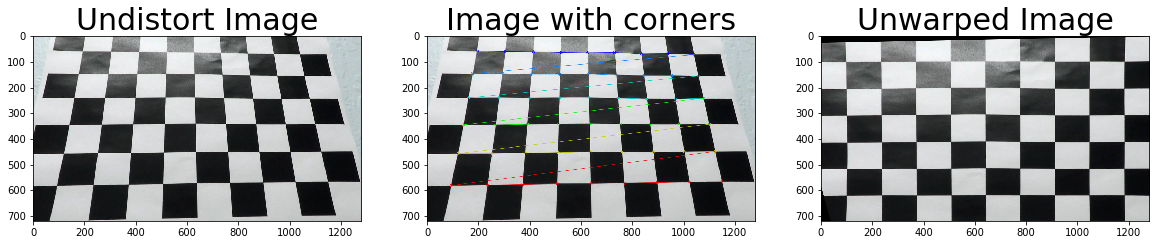

In [22]:
import copy

nx, ny = 9, 6
offset = 100
# unwarp test_img
test_img = cv2.imread('camera_cal/calibration3.jpg')
undst_img = cv2.undistort(test_img, mtx, dist, None, mtx)
test_gray = cv2.cvtColor(undst_img, cv2.COLOR_BGR2GRAY)
img_size = (test_gray.shape[1], test_gray.shape[0])
ret, corners = cv2.findChessboardCorners(test_gray, (nx, ny), None)
print(ret)

img_w_corners = copy.deepcopy(undst_img)
cv2.drawChessboardCorners(img_w_corners, (nx, ny), corners, ret)

# choose four corners, top_left, top_right, bottom_right, bottom_left
src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
dst = np.float32([[offset, offset],
                  [img_size[0]-offset, offset],
                  [img_size[0]-offset, img_size[1]-offset],
                  [offset, img_size[1]-offset]])

# get M
M = cv2.getPerspectiveTransform(src, dst)
# Warp the image
warped = cv2.warpPerspective(undst_img, M, img_size)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(undst_img)
ax1.set_title('Undistort Image', fontsize=30)
ax2.imshow(img_w_corners)
ax2.set_title('Image with corners', fontsize=30)
ax3.imshow(warped)
ax3.set_title('Unwarped Image', fontsize=30)

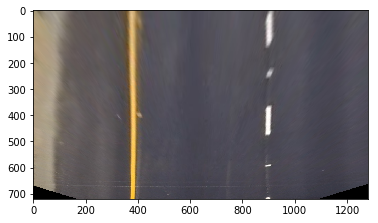

In [24]:
# find the source and destination points to warp the image
# get error or not responding to show image by cv2, show it from console
size = (1280, 720)
offset = 380
top_left = [570,470]
top_right = [720, 470]
# top_right, top_left, bottom_left, bottom_right
src = np.float32([[582, 460], [700, 460], [1017, 660], [292, 660]])
dst = np.float32([[offset, 0], [size[0]-offset, 0], [size[0]-offset, 720], [offset, 720]])
M = cv2.getPerspectiveTransform(src, dst)
img_line1 = mpimg.imread('test_images/straight_lines1.jpg')
img_size = (img_line1.shape[1], img_line1.shape[0])
warped = cv2.warpPerspective(img_line1, M, img_size)
plt.imshow(warped)
plt.savefig('test_images/straight_lines1_warped.jpg')
plt.show()

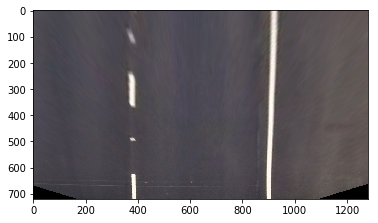

In [25]:
img_line2 = mpimg.imread('test_images/straight_lines2.jpg')
img_size = (img_line2.shape[1], img_line2.shape[0])
warped = cv2.warpPerspective(img_line2, M, img_size)
plt.imshow(warped)
plt.savefig('test_images/straight_lines2_warped.jpg')
plt.show()

Text(0.5,1,'B')

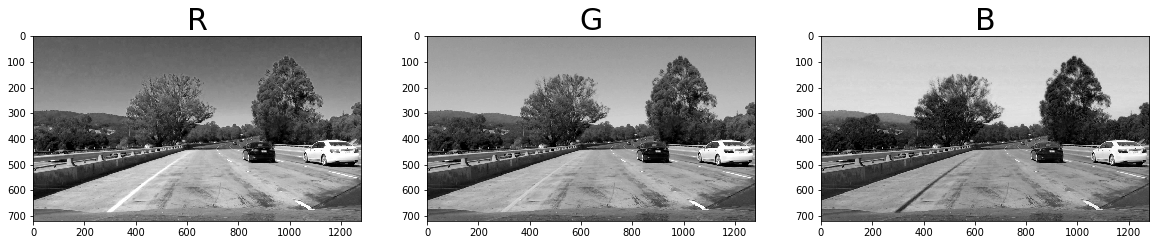

In [44]:
# color space, exploration
image = mpimg.imread('test_images/test1.jpg')
RGB = image
R = RGB[:,:,0]
G = RGB[:,:,1]
B = RGB[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(R, cmap='gray')
ax1.set_title('R', fontsize=30)
ax2.imshow(G, cmap='gray')
ax2.set_title('G', fontsize=30)
ax3.imshow(B, cmap='gray')
ax3.set_title('B', fontsize=30)

Text(0.5,1,'B_R')

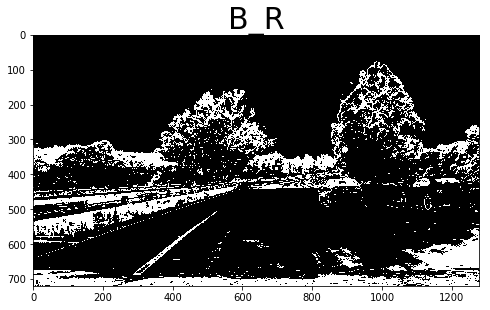

In [62]:
SH = [50, 100]
Color = B
binary = np.zeros_like(Color)
binary[(Color>SH[0]) & (Color<SH[1])] = 1
f, axs = plt.subplots(1, 1, figsize=(8, 10))
axs.imshow(binary, cmap='gray')
axs.set_title('B_R', fontsize=30)

Text(0.5,1,'S')

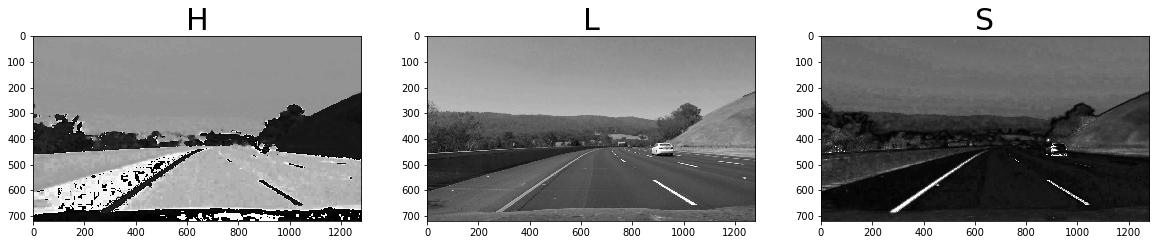

In [67]:
# color space, exploration
image = mpimg.imread('test_images/test3.jpg')
HLS = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = HLS[:,:,0]
L = HLS[:,:,1]
S = HLS[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(H, cmap='gray')
ax1.set_title('H', fontsize=30)
ax2.imshow(L, cmap='gray')
ax2.set_title('L', fontsize=30)
ax3.imshow(S, cmap='gray')
ax3.set_title('S', fontsize=30)

Text(0.5,1,'B_R')

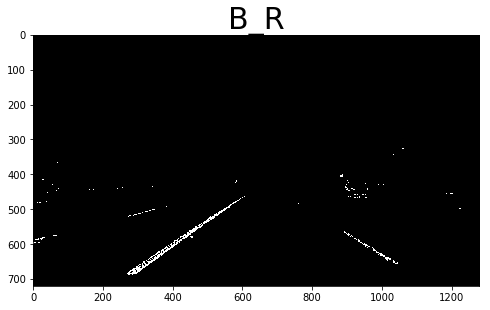

In [76]:
SH = [125, 255]
Color = S
binary = np.zeros_like(Color)
binary[(Color>SH[0]) & (Color<SH[1])] = 1
f, axs = plt.subplots(1, 1, figsize=(8, 10))
axs.imshow(binary, cmap='gray')
axs.set_title('B_R', fontsize=30)

In [40]:
image = mpimg.imread('test_images/test1.jpg')
image[0:3,0:3,:]

array([[[254, 233, 216],
        [245, 238, 232],
        [196, 205, 212]],

       [[245, 238, 232],
        [188, 193, 197],
        [137, 158, 175]],

       [[193, 202, 209],
        [134, 157, 173],
        [115, 154, 183]]], dtype=uint8)

In [41]:
HLS = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
HLS[0:3,0:3,:]

array([[[ 13, 235, 242],
        [ 14, 239, 100],
        [103, 204,  40]],

       [[ 14, 239, 100],
        [103, 193,  18],
        [103, 156,  49]],

       [[103, 201,  38],
        [102, 154,  49],
        [103, 149,  82]]], dtype=uint8)

In [ ]:
# gradient
